In [1]:
import numpy as np
import keras
import cv2
import os
import sys
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!ls

"ls" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


Directories where training and test data are stored.

In [2]:
train_dir = "dogs_cats_train"
test_dir = "dogs_cats_test"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
ImSize = 64
input_shape = (ImSize, ImSize, 3)
batch_size = 32

Data generators.

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

Data generators from folders.

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                target_size=(ImSize, ImSize), 
                batch_size = batch_size)
test_generator = test_datagen.flow_from_directory(test_dir, 
                    target_size=(ImSize, ImSize), batch_size=1,
                    shuffle = False)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Names of classes are names of folders.

In [7]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

Filenames and classes of training set.

In [9]:
print(train_generator.filenames)
print(train_generator.classes)

['cats\\cat.100.jpg', 'cats\\cat.101.jpg', 'cats\\cat.102.jpg', 'cats\\cat.103.jpg', 'cats\\cat.104.jpg', 'cats\\cat.105.jpg', 'cats\\cat.106.jpg', 'cats\\cat.107.jpg', 'cats\\cat.108.jpg', 'cats\\cat.109.jpg', 'cats\\cat.110.jpg', 'cats\\cat.111.jpg', 'cats\\cat.112.jpg', 'cats\\cat.113.jpg', 'cats\\cat.114.jpg', 'cats\\cat.115.jpg', 'cats\\cat.116.jpg', 'cats\\cat.117.jpg', 'cats\\cat.118.jpg', 'cats\\cat.119.jpg', 'cats\\cat.120.jpg', 'cats\\cat.121.jpg', 'cats\\cat.122.jpg', 'cats\\cat.123.jpg', 'cats\\cat.124.jpg', 'cats\\cat.125.jpg', 'cats\\cat.126.jpg', 'cats\\cat.127.jpg', 'cats\\cat.128.jpg', 'cats\\cat.129.jpg', 'cats\\cat.130.jpg', 'cats\\cat.131.jpg', 'cats\\cat.132.jpg', 'cats\\cat.133.jpg', 'cats\\cat.134.jpg', 'cats\\cat.135.jpg', 'cats\\cat.136.jpg', 'cats\\cat.137.jpg', 'cats\\cat.138.jpg', 'cats\\cat.139.jpg', 'cats\\cat.140.jpg', 'cats\\cat.141.jpg', 'cats\\cat.142.jpg', 'cats\\cat.143.jpg', 'cats\\cat.144.jpg', 'cats\\cat.145.jpg', 'cats\\cat.146.jpg', 'cats\\cat.1

Convolutional neural network.

In [8]:
from keras.layers import Conv2D, MaxPool2D, Flatten, \
Dense, Dropout, BatchNormalization

In [9]:
model = keras.models.Sequential()
model.add(Conv2D(64, (3,3), padding="same", activation='relu',
                 input_shape = input_shape))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), padding="same", activation='relu'))
model.add(MaxPool2D((8,8)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 512)         1180160   
__________

In [11]:
model.compile(keras.optimizers.Adam(), 
              loss = keras.losses.categorical_crossentropy, 
             metrics = ['accuracy'])

fit_generator function uses generator to generate batches of data to train model.

In [12]:
model.fit_generator(train_generator, 
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs = 3)

Epoch 1/3
56/56 [==============================] - 202s 4s/step - loss: 0.7008 - acc: 0.5223
Epoch 2/3
56/56 [==============================] - 240s 4s/step - loss: 0.6673 - acc: 0.5871
Epoch 3/3
56/56 [==============================] - 221s 4s/step - loss: 0.6459 - acc: 0.6138


evaluate_generator is used to calculate accuracy of the model on data located in folders.

In [13]:
score = model.evaluate_generator(test_generator.n)

In [14]:
print(score)

[0.6140089653246105, 0.685]


Example of data augmentation on sample image.

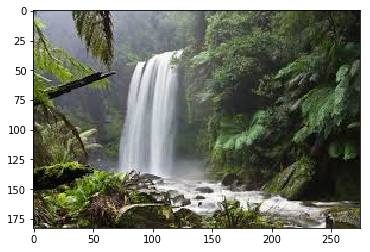

In [15]:
img = plt.imread("nature.jpg")
plt.imshow(img)
plt.show()

In [16]:
nature_datagen = ImageDataGenerator(shear_range=0.2, 
                                    rotation_range=30,
                                    width_shift_range = 0.2,
                                   height_shift_range = 0.2, 
                                    fill_mode = "constant")

In [17]:
img.shape

(183, 275, 3)

In [18]:
nature_gen = nature_datagen.flow(img.reshape((1,)+img.shape), 
                                 batch_size=1)

Generating transformed image with function next()

In [19]:
img_new = nature_gen.next()

In [20]:
img_new.shape

(1, 183, 275, 3)

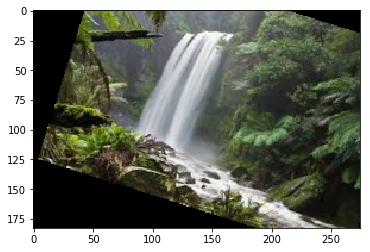

In [21]:
plt.imshow(img_new[0]/255)
plt.show()

Reversing class_indices dictionary to get class labels from indices

In [30]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [31]:
id_to_label = {class_id: label for (label, class_id) \
               in train_generator.class_indices.items()}

In [32]:
id_to_label

{0: 'cats', 1: 'dogs'}

Loading the model trained on google colaboratory.

In [26]:
model = keras.models.load_model("model_cats_dogs")

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 512)         1180160   
__________

Using the trained conv net to classify images from webcam.

In [35]:
cap = cv2.VideoCapture(0)

try:
    while(True):
        ret, frame = cap.read()
        if (not ret):
            break
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_rgb = cv2.resize(image_rgb, (ImSize, ImSize))
        image_rgb = image_rgb.reshape((1,)+image_rgb.shape)/255
        probs = model.predict(image_rgb)[0]
        class_id = np.argmax(probs)
        class_label = id_to_label[class_id]
        if (probs[class_id]<0.9):
            text = "Background"
        else:
            text = str(class_label) +": " + str(probs[class_id])
        
        cv2.putText(frame, text,(100, 100), 
                    cv2.FONT_HERSHEY_COMPLEX, 2, (255,0,0))
        cv2.imshow("frame",frame)
        if (cv2.waitKey(1) == ord('q')):
            break
except Exception as e:
    print(e)

cap.release()
cv2.destroyAllWindows()